In [1]:
import matplotlib.pyplot as plt
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"]="0"

import numpy as np
import itertools
from glob import glob

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import pickle 
from tensorflow.keras.models import load_model
from annsa.model_classes import f1
from sklearn.metrics import f1_score
from annsa.load_pretrained_network import load_features

Using TensorFlow backend.


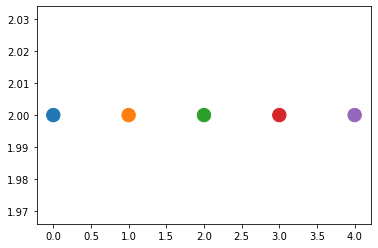

In [2]:
from aux_functions import *

# Load all models into dictionaries

In [3]:
all_models = {}

### Binarize labels, do this better

In [4]:
dataset = np.load('../dataset_generation/testing_dataset_full_200keV_100.npy')

mlb = LabelBinarizer()
keys = dataset.item()['keys']
mlb.fit(keys)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

### Load networks trained with fixed-size datasets

In [5]:
all_models = {}

trainsize = '10000'

model_classes = ['dnn', 'cnn', 'daednn', 'caednn',]

for mode in ['easy', 'full']:
    for model_class in model_classes:
        print(model_class + ' ' + mode + '...')
        temp_models = []
        for i in range(5):
            i = str(i)
            identifier = '-final_trainsize'
            if model_classes == 'cnn':
                identifier = '-final-reluupdate_trainsize'

            temp_model = load_model(
                os.path.join('..',
                'final_training_notebooks',
                'final-models-keras',
#                 'learningcurve-'+model_class+'-'+mode+'-final_trainsize'+trainsize+'_fold'+i+'.hdf5',),
                'learningcurve-'+model_class+'-'+mode+identifier+trainsize+'_fold'+i+'.hdf5',),
                custom_objects={'f1': f1},
                compile=False,
            )
            temp_models.append(temp_model)
        all_models[model_class+'-'+mode] = temp_models

scalers = {}
model_classes = ['dnn', 'cnn',]
for mode in ['easy', 'full']:
    for model_class in model_classes:
        architecture_id = '../final_training_notebooks/final-models/learningcurve-'+model_class+'-'+mode+'-final-features'
        model_features = load_features(architecture_id)
        scalers[model_class+'-'+mode] = model_features.scaler.transform
        if model_class == 'dnn':
            scalers['daednn'+'-'+mode] = model_features.scaler.transform
        if model_class == 'cnn':
            scalers['caednn'+'-'+mode] = model_features.scaler.transform


dnn easy...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
cnn easy...
daednn easy...
caednn easy...
dnn full...
cnn full...
daednn full...
caednn full...


# Create results dataframe 

In [6]:
dataframe_data = []

## Ba133

In [7]:
isotope = 'ba133'

In [8]:
shielding_material = 'none'
shielding_amounts = ['_none_10sbr_']
shielding_strings = ['none']
spectra_path = 'detector131_745v_10s_'
spectra_date = '06-21-19'

dataframe_data = shielding_predictions(dataframe_data,
                                       all_models,
                                       scalers,
                                       shielding_material=shielding_material,
                                       shielding_amounts=shielding_amounts,
                                       shielding_strings=shielding_strings,
                                       isotope=isotope,
                                       spectra_path=spectra_path,
                                       spectra_date=spectra_date)

spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding


In [9]:
shielding_material = 'aluminum'
shielding_amounts = ['_al30_10sbr_22cm_',
                     '_al30_10sbr_18-2cm_',
                     '_al60_10sbr_14-8cm_']
shielding_strings = ['light', 'medium', 'heavy']
spectra_path = 'detector131_745v_10s_'
spectra_date = '06-21-19'

dataframe_data = shielding_predictions(dataframe_data,
                                       all_models,
                                       scalers,
                                       shielding_material=shielding_material,
                                       shielding_amounts=shielding_amounts,
                                       shielding_strings=shielding_strings,
                                       isotope=isotope,
                                       spectra_path=spectra_path,
                                       spectra_date=spectra_date)

spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown e

In [10]:
shielding_material = 'iron'
shielding_amounts = ['_fe60_10sbr_17cm_']
shielding_strings = ['medium']
spectra_path = 'detector131_745v_10s_'
spectra_date = '06-21-19'

dataframe_data = shielding_predictions(dataframe_data,
                                       all_models,
                                       scalers,
                                       shielding_material=shielding_material,
                                       shielding_amounts=shielding_amounts,
                                       shielding_strings=shielding_strings,
                                       isotope=isotope,
                                       spectra_path=spectra_path,
                                       spectra_date=spectra_date)

spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding


## Eu152

In [11]:
isotope = 'eu152'

In [12]:
shielding_material = 'none'
shielding_amounts = ['*none*']
shielding_strings = ['none']
spectra_path = 'detector131_770v_10s_'
spectra_date = '06-20-19'

dataframe_data = shielding_predictions(dataframe_data,
                                       all_models,
                                       scalers,
                                       shielding_material=shielding_material,
                                       shielding_amounts=shielding_amounts,
                                       shielding_strings=shielding_strings,
                                       isotope=isotope,
                                       spectra_path=spectra_path,
                                       spectra_date=spectra_date)

spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding


In [13]:
shielding_material = 'aluminum'
shielding_amounts = ['*_al20*', '*_al40*', '*_al60*']
shielding_strings = ['light', 'medium', 'heavy']
spectra_path = 'detector131_745v_10s_'
spectra_date = '06-21-19'

dataframe_data = shielding_predictions(dataframe_data,
                                       all_models,
                                       scalers,
                                       shielding_material=shielding_material,
                                       shielding_amounts=shielding_amounts,
                                       shielding_strings=shielding_strings,
                                       isotope=isotope,
                                       spectra_path=spectra_path,
                                       spectra_date=spectra_date)

spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown e

In [14]:
shielding_material = 'iron'
shielding_amounts = ['*_fe1*', '*_fe2*', '*_fe3*']
shielding_strings = ['light', 'medium', 'heavy']
spectra_path = 'detector131_745v_10s_'
spectra_date = '06-21-19'

dataframe_data = shielding_predictions(dataframe_data,
                                       all_models,
                                       scalers,
                                       shielding_material=shielding_material,
                                       shielding_amounts=shielding_amounts,
                                       shielding_strings=shielding_strings,
                                       isotope=isotope,
                                       spectra_path=spectra_path,
                                       spectra_date=spectra_date)

spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown e

In [15]:
shielding_material = 'lead'
shielding_amounts = ['*_pb1*', '*_pb2*', '*_pb3*']
shielding_strings = ['light', 'medium', 'heavy']
spectra_path = 'detector131_745v_10s_'
spectra_date = '06-21-19'

dataframe_data = shielding_predictions(dataframe_data,
                                       all_models,
                                       scalers,
                                       shielding_material=shielding_material,
                                       shielding_amounts=shielding_amounts,
                                       shielding_strings=shielding_strings,
                                       isotope=isotope,
                                       spectra_path=spectra_path,
                                       spectra_date=spectra_date)

spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown e

## Co60

In [16]:
isotope = 'co60'

In [17]:
shielding_material = 'none'
shielding_amounts = ['*none*']
shielding_strings = ['none']
spectra_path = 'detector131_770v_10s_'
spectra_date = '06-20-19'

dataframe_data = shielding_predictions(dataframe_data,
                                       all_models,
                                       scalers,
                                       shielding_material=shielding_material,
                                       shielding_amounts=shielding_amounts,
                                       shielding_strings=shielding_strings,
                                       isotope=isotope,
                                       spectra_path=spectra_path,
                                       spectra_date=spectra_date)

spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding


In [18]:
shielding_material = 'aluminum'
shielding_amounts = ['*_al20*']
shielding_strings = ['light']
spectra_path = 'detector131_745v_10s_'
spectra_date = '06-21-19'

dataframe_data = shielding_predictions(dataframe_data,
                                       all_models,
                                       scalers,
                                       shielding_material=shielding_material,
                                       shielding_amounts=shielding_amounts,
                                       shielding_strings=shielding_strings,
                                       isotope=isotope,
                                       spectra_path=spectra_path,
                                       spectra_date=spectra_date)

spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding


In [19]:
shielding_material = 'iron'
shielding_amounts = ['*_fe20*', '*_fe40*', '*_fe60*']
shielding_strings = ['light', 'medium', 'heavy']
spectra_path = 'detector131_745v_10s_'
spectra_date = '06-21-19'

dataframe_data = shielding_predictions(dataframe_data,
                                       all_models,
                                       scalers,
                                       shielding_material=shielding_material,
                                       shielding_amounts=shielding_amounts,
                                       shielding_strings=shielding_strings,
                                       isotope=isotope,
                                       spectra_path=spectra_path,
                                       spectra_date=spectra_date)

spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown e

In [20]:
shielding_material = 'lead'
shielding_amounts = ['*_pb20*',
                     '*_pb40*',
                     '*_pb60*']
shielding_strings = ['light', 'medium', 'heavy']
spectra_path = 'detector131_745v_10s_'
spectra_date = '06-21-19'

dataframe_data = shielding_predictions(dataframe_data,
                                       all_models,
                                       scalers,
                                       shielding_material=shielding_material,
                                       shielding_amounts=shielding_amounts,
                                       shielding_strings=shielding_strings,
                                       isotope=isotope,
                                       spectra_path=spectra_path,
                                       spectra_date=spectra_date)

spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown e

## Cs137

In [21]:
isotope = 'cs137'

In [22]:
shielding_material = 'none'
shielding_amounts = ['*none*']
shielding_strings = ['none']
spectra_path = 'detector131_770v_10s_'
spectra_date = '06-20-19'

dataframe_data = shielding_predictions(dataframe_data,
                                       all_models,
                                       scalers,
                                       shielding_material=shielding_material,
                                       shielding_amounts=shielding_amounts,
                                       shielding_strings=shielding_strings,
                                       isotope=isotope,
                                       spectra_path=spectra_path,
                                       spectra_date=spectra_date)

spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding


In [23]:
shielding_material = 'aluminum'
shielding_amounts = ['*_al20*', '*_al40*']
shielding_strings = ['light', 'medium']
spectra_path = 'detector131_745v_10s_'
spectra_date = '06-21-19'

dataframe_data = shielding_predictions(dataframe_data,
                                       all_models,
                                       scalers,
                                       shielding_material=shielding_material,
                                       shielding_amounts=shielding_amounts,
                                       shielding_strings=shielding_strings,
                                       isotope=isotope,
                                       spectra_path=spectra_path,
                                       spectra_date=spectra_date)

spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown e

In [24]:
shielding_material = 'iron'
shielding_amounts = ['*_fe20*', '*_fe40*', '*_fe60*']
shielding_strings = ['light', 'medium', 'heavy']
spectra_path = 'detector131_745v_10s_'
spectra_date = '06-21-19'

dataframe_data = shielding_predictions(dataframe_data,
                                       all_models,
                                       scalers,
                                       shielding_material=shielding_material,
                                       shielding_amounts=shielding_amounts,
                                       shielding_strings=shielding_strings,
                                       isotope=isotope,
                                       spectra_path=spectra_path,
                                       spectra_date=spectra_date)

spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown e

In [25]:
shielding_material = 'lead'
shielding_amounts = ['*_pb75*']
shielding_strings = ['heavy']
spectra_path = 'detector131_745v_10s_'
spectra_date = '06-21-19'

dataframe_data = shielding_predictions(dataframe_data,
                                       all_models,
                                       scalers,
                                       shielding_material=shielding_material,
                                       shielding_amounts=shielding_amounts,
                                       shielding_strings=shielding_strings,
                                       isotope=isotope,
                                       spectra_path=spectra_path,
                                       spectra_date=spectra_date)

spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding
spe in unknown encoding


### Save data in dataframe

In [26]:
columns = ['model_id', 'shielding_material', 'shielding_strings', 'isotope', 'all_spectra', 'posterior_prob']

results_dataframe = pd.DataFrame(dataframe_data, columns=columns)


In [27]:
from matplotlib.lines import Line2D

linestyles = ['-', '--', '-.', ':']

custom_lines = [Line2D([0], [0], color=c1.colors[3], lw=4),
                Line2D([0], [0], color='k', linestyle=linestyles[0], markersize=15, lw=3),
                Line2D([0], [0], color=c1.colors[2], lw=4),
                Line2D([0], [0], color='k', linestyle=linestyles[1], markersize=15, lw=3),
                Line2D([0], [0], color=c1.colors[0], lw=4),
                Line2D([0], [0], color='k', linestyle=linestyles[2], markersize=15, lw=3),
                Line2D([0], [0], color=c1.colors[1], lw=4),
                Line2D([0], [0], color='k', linestyle=linestyles[3], markersize=15, lw=3),
               ]

In [28]:
def make_blank_plot():

    plt.rcParams.update({'font.size': 25})
    fig, axs = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10,5))

    for ax in axs:
        ax.set_ylim([0,110])

    axs[1].set_xlabel('Integration Time (s)')

    axs[0].set_ylabel('Dataset: Simple \n Posterior Probability')
    axs[1].set_ylabel('Dataset: Complete \n Posterior Probability')
    return fig, axs

In [29]:
def plot_measured_source_results(results_dataframe,
                                 isotope,
                                 gadras_isotope,
                                 sb_ratio,
                                 setting,
                                 pmt_gains,):
    gadras_index = np.argwhere(mlb.classes_ == gadras_isotope).flatten()[0]
    for option_index, pmt_gain in enumerate(pmt_gains):
        for model_idindex, model_id in enumerate(['caednn-'+setting,
                                                  'daednn-'+setting,
                                                  'dnn-'+setting,
                                                  'cnn-'+setting,]):
            results_dataframe_tmp = results_dataframe[results_dataframe['model_id'] == model_id]
            results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['sb_ratio'] == sb_ratio]
            results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['isotope'] == isotope]
            results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['pmt_gain'] == pmt_gain]

            if setting == 'easy':
                setting_index = 0
            else:
                setting_index = 1

            if sb_ratio == 0.5:
                sb_ratio_index = 0
            else:
                sb_ratio_index = 1
            
            axs[setting_index][sb_ratio_index].plot(
                np.linspace(10,300,30),
                100*np.array(results_dataframe_tmp['posterior_prob'].values[0]).reshape(30,30)[:,gadras_index], 
                label=pmt_gain,
                linewidth=2.5,
                linestyle=linestyles[option_index],
                color=c1.colors[model_idindex],)  
    

In [30]:
def plot_measured_source_shielded_results(results_dataframe,
                                          isotope,
                                          gadras_isotope,
                                          shielding_material,
                                          shielding_strings,
                                          setting,):

    plt.rcParams.update({'font.size': 20})
    gadras_index = np.argwhere(mlb.classes_ == gadras_isotope).flatten()[0]
#     plt.figure(figsize=(10,5))
    for option_index, shielding_string in enumerate(shielding_strings):
        for model_idindex, model_id in enumerate(['caednn-'+setting,
                                                  'daednn-'+setting,
                                                  'dnn-'+setting,
                                                  'cnn-'+setting,]):
            results_dataframe_tmp = results_dataframe[results_dataframe['model_id'] == model_id]
            results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['isotope'] == isotope]
            results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['shielding_material'] == shielding_material]
            results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['shielding_strings'] == shielding_string]

            if setting == 'easy':
                setting_index = 0
            else:
                setting_index = 1

            axs[setting_index].plot(
                np.linspace(10,300,30),
                100*np.array(results_dataframe_tmp['posterior_prob'].values[0]).reshape(30,30)[:,gadras_index],
                linewidth=2.5,
                linestyle=linestyles[option_index],
                color=c1.colors[model_idindex],)
    plt.ylim([0,110])

In [31]:
save_fig = False
plt.rcParams.update({'font.size': 23})

In [33]:
linestyles = ['-', '--', '-.', ':']
spectrum_colors = [
    'k',
    'fuchsia',
    'green',
    ]


custom_lines_spectra = [
    Line2D([0], [0], color=spectrum_colors[0], lw=4),
    Line2D([0], [0], color=spectrum_colors[1], lw=4),
    Line2D([0], [0], color=spectrum_colors[2], lw=4),
    ]

shielding_thicknesses = {
    'eu152' : [
        '37.5 mm',
        '25.0 mm',
        '12.5 mm',
        ],
    'ba133' : [
        '51.0 mm',
        '25.5 mm',
        '6.56 mm',],
    'co60' : [
        '50.0 mm',
        '37.5 mm',
        '25.0 mm',],
    'cs137' : [
        '37.5 mm',
        '25.0 mm',
        '12.5 mm',],
    }


loc = (0.0, -0.5) 

## Eu152

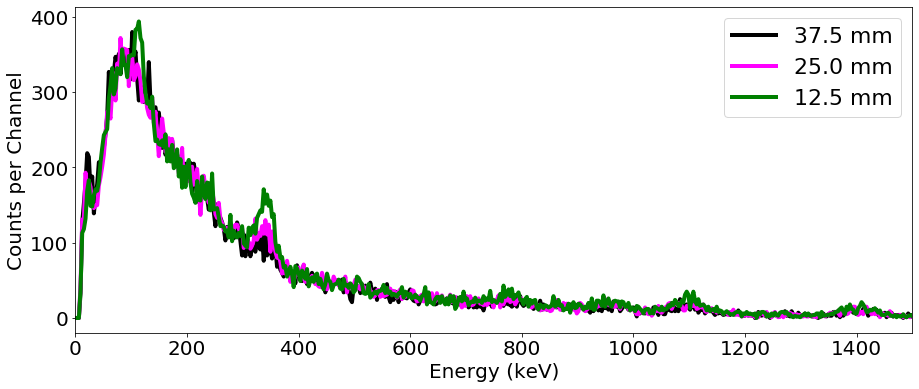

In [50]:
setting = 'easy'
isotope = 'eu152'
shielding_material = 'iron'


plt.figure(figsize=(15,6))
for shielding_index, shielding_string in enumerate(['heavy', 'medium', 'light',]):
    results_dataframe_tmp = results_dataframe[results_dataframe['model_id'] == 'dnn-easy']
    results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['isotope'] == isotope]
    results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['shielding_material'] == shielding_material]
    results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['shielding_strings'] == shielding_string]
    plt.plot(2.98443*np.arange(1024)-23.7,
             np.cumsum(results_dataframe_tmp['all_spectra'].values)[0][6],
             linewidth=4.,
             color=spectrum_colors[shielding_index],
             linestyle = '-',)
# plt.semilogy()
plt.xlim(0,1500)
# plt.ylim(1e1,5e3)
plt.ylabel('Counts per Channel')
plt.xlabel('Energy (keV)')

plt.legend(custom_lines_spectra,
          shielding_thicknesses[isotope], 
          prop={'size': 22},
          )


In [35]:
def make_blank_plot():

    plt.rcParams.update({'font.size': 25})
    fig, axs = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15,12))

    for ax in axs:
        ax.set_ylim([0,110])

    axs[1].set_xlabel('Integration Time (s)')

    axs[0].set_ylabel('Dataset: Simple \n Posterior Probability')
    axs[1].set_ylabel('Dataset: Complete \n Posterior Probability')
    return fig, axs

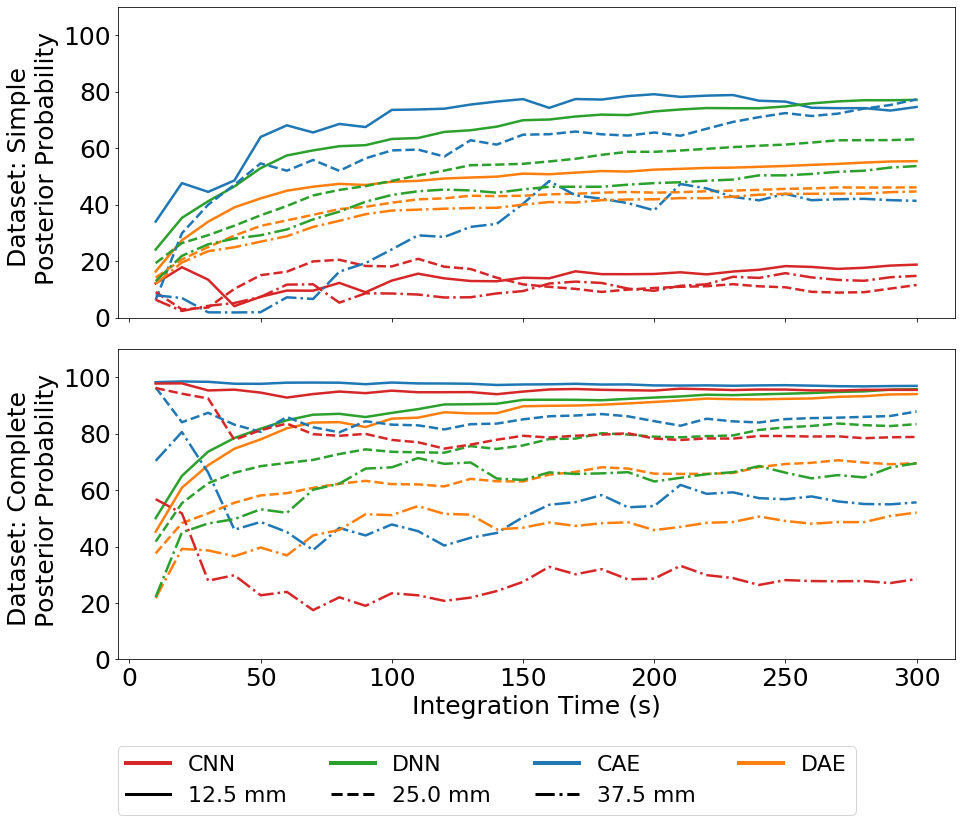

In [36]:
isotope = 'eu152'
gadras_isotope = '152EU'

fig, axs = make_blank_plot()
ax = plt.gca()
ax.legend(custom_lines,
          ['CNN', 
          shielding_thicknesses[isotope][2], 
          'DNN',
          shielding_thicknesses[isotope][1],
          'CAE',
          shielding_thicknesses[isotope][0],
          'DAE',], 
          loc=loc,
          ncol=4,
          prop={'size': 22},
          )


for setting in ['easy', 'full']:
    for shielding_material in ['iron']:
        plot_measured_source_shielded_results(
            results_dataframe=results_dataframe,
            isotope=isotope,
            gadras_isotope=gadras_isotope,
            shielding_material=shielding_material,
            shielding_strings=['light', 'medium', 'heavy'],
            setting=setting,)

fig.subplots_adjust(hspace=0.1)
if save_fig:
    plt.savefig('realspectra-cal-'+isotope,
                bbox_inches='tight')
            
            

## Ba133

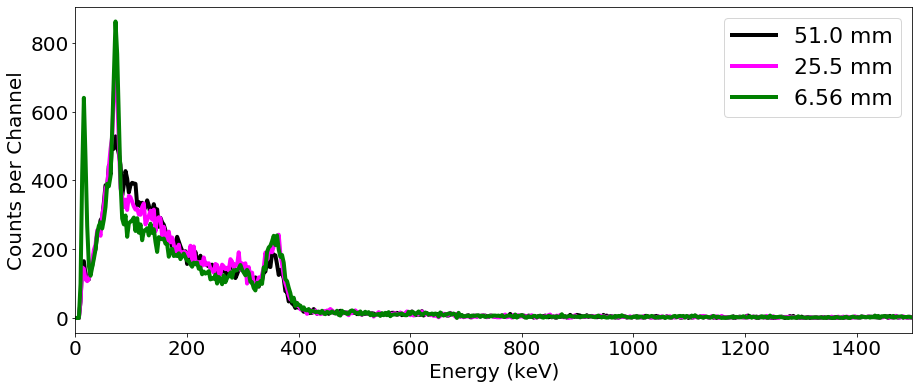

In [49]:
setting = 'easy'
isotope = 'ba133'
gadras_isotope = '133BA'
shielding_material = 'aluminum'

plt.figure(figsize=(15,6))
for shielding_index, shielding_string in enumerate(['heavy', 'medium', 'light',]):
    results_dataframe_tmp = results_dataframe[results_dataframe['model_id'] == 'dnn-easy']
    results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['isotope'] == isotope]
    results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['shielding_material'] == shielding_material]
    results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['shielding_strings'] == shielding_string]
    plt.plot(2.98443*np.arange(1024)-23.7,
             np.cumsum(results_dataframe_tmp['all_spectra'].values)[0][6],
             linewidth=4.,
             color=spectrum_colors[shielding_index],
             linestyle = '-',)
plt.xlim(0,1500)
plt.ylabel('Counts per Channel')
plt.xlabel('Energy (keV)')

plt.legend(custom_lines_spectra,
          shielding_thicknesses[isotope], 
          prop={'size': 22},
          )


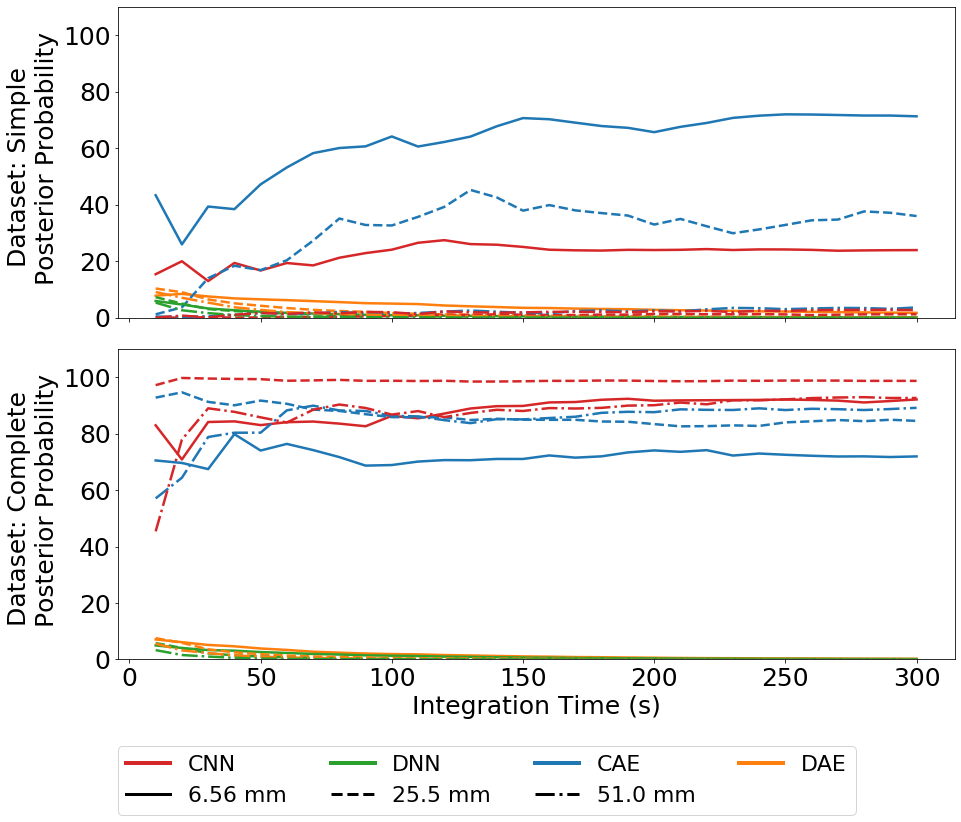

In [38]:
setting = 'easy'
isotope = 'ba133'
gadras_isotope = '133BA'

fig, axs = make_blank_plot()
ax = plt.gca()
ax.legend(custom_lines,
          ['CNN', 
            shielding_thicknesses[isotope][2], 
            'DNN',
            shielding_thicknesses[isotope][1],
            'CAE',
            shielding_thicknesses[isotope][0],
            'DAE',], 
          loc=loc,
          ncol=4,
          prop={'size': 22},
          )


for setting in ['easy', 'full']:
    for shielding_material in ['aluminum']:
        plot_measured_source_shielded_results(
            results_dataframe=results_dataframe,
            isotope=isotope,
            gadras_isotope=gadras_isotope,
            shielding_material=shielding_material,
            shielding_strings=['light', 'medium', 'heavy'],
            setting=setting,)

fig.subplots_adjust(hspace=0.1)
if save_fig:
    plt.savefig('realspectra-cal-'+isotope,
                bbox_inches='tight')
            
            

## Co60

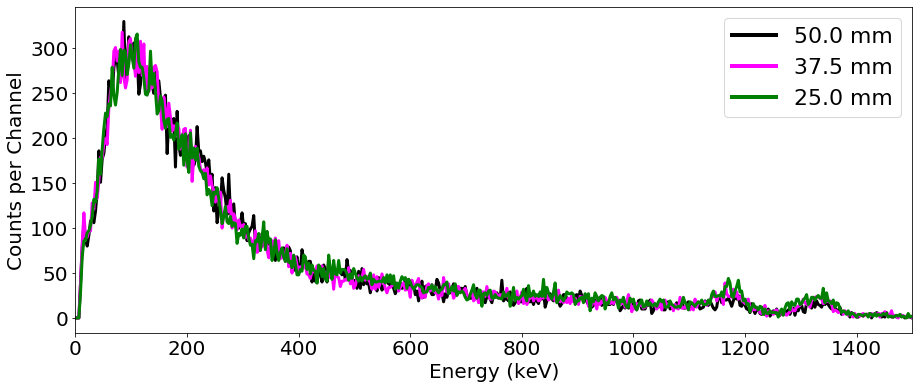

In [48]:
setting = 'easy'
isotope = 'co60'
shielding_material = 'iron'

plt.figure(figsize=(15,6))
for shielding_index, shielding_string in enumerate(['heavy', 'medium', 'light',]):
    results_dataframe_tmp = results_dataframe[results_dataframe['model_id'] == 'dnn-easy']
    results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['isotope'] == isotope]
    results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['shielding_material'] == shielding_material]
    results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['shielding_strings'] == shielding_string]
    plt.plot(2.98443*np.arange(1024)-23.7,
             np.cumsum(results_dataframe_tmp['all_spectra'].values)[0][6],
             linewidth=3.,
             color=spectrum_colors[shielding_index],
             linestyle = '-',)
# plt.semilogy()
plt.xlim(0,1500)
# plt.ylim(1e1,5e3)
plt.ylabel('Counts per Channel')
plt.xlabel('Energy (keV)')

plt.legend(custom_lines_spectra,
          shielding_thicknesses[isotope], 
          prop={'size': 22},
          )


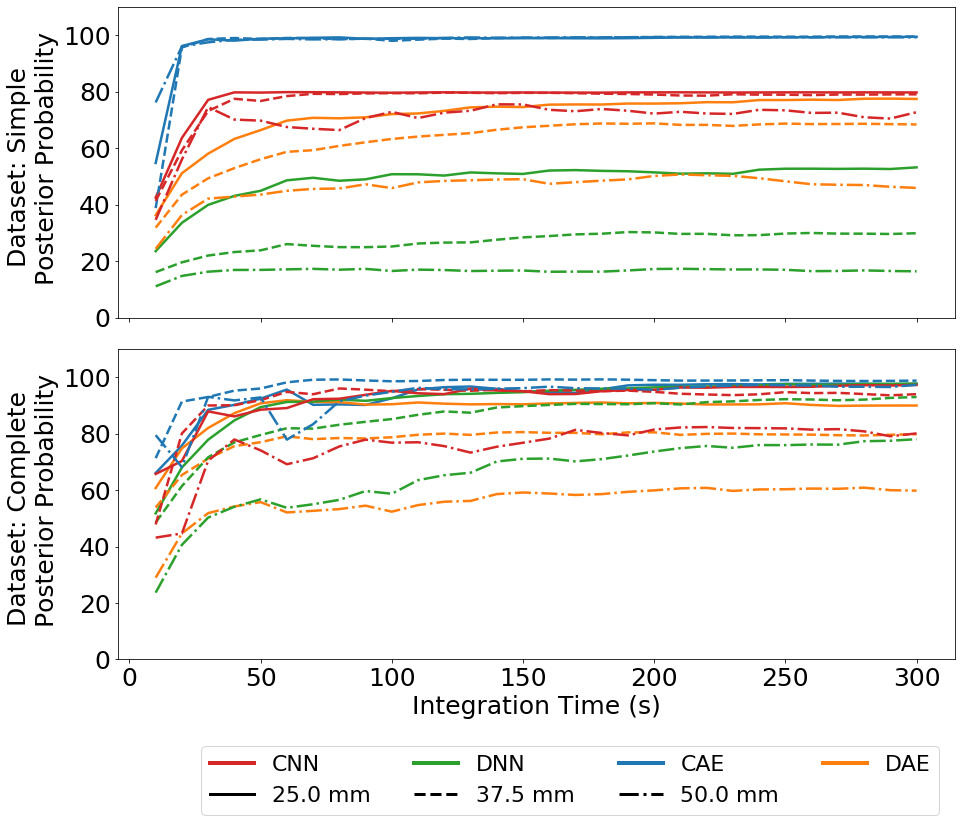

In [40]:
setting = 'easy'
isotope = 'co60'
gadras_isotope = '60CO'

fig, axs = make_blank_plot()
ax = plt.gca()
ax.legend(custom_lines,
          ['CNN', 
          shielding_thicknesses[isotope][2], 
          'DNN',
          shielding_thicknesses[isotope][1],
          'CAE',
          shielding_thicknesses[isotope][0],
          'DAE',], 
          loc=(0.1, -0.5),
          ncol=4,
          prop={'size': 22},
          )


for setting in ['easy', 'full']:
    for shielding_material in ['iron']:
        plot_measured_source_shielded_results(
            results_dataframe=results_dataframe,
            isotope=isotope,
            gadras_isotope=gadras_isotope,
            shielding_material=shielding_material,
            shielding_strings=['light', 'medium', 'heavy'],
            setting=setting,)

fig.subplots_adjust(hspace=0.1)
if save_fig:
    plt.savefig('realspectra-cal-'+isotope,
                bbox_inches='tight')
            
            

## Cs137

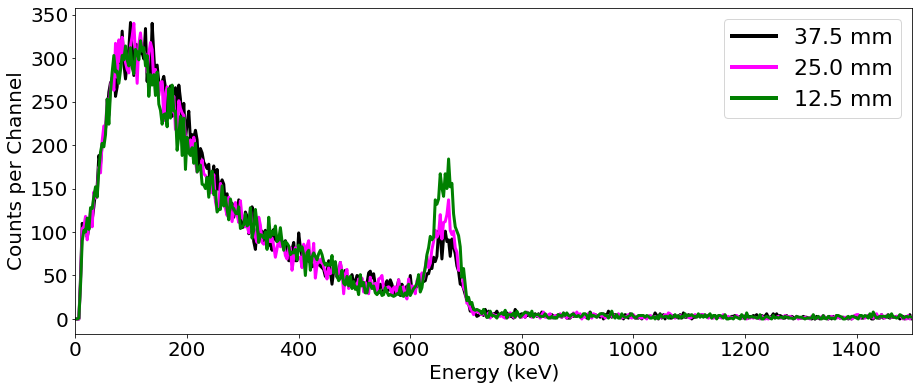

In [47]:
setting = 'easy'
isotope = 'cs137'
shielding_material = 'iron'

plt.figure(figsize=(15,6))
for shielding_index, shielding_string in enumerate(['heavy', 'medium', 'light',]):
    results_dataframe_tmp = results_dataframe[results_dataframe['model_id'] == 'dnn-easy']
    results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['isotope'] == isotope]
    results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['shielding_material'] == shielding_material]
    results_dataframe_tmp = results_dataframe_tmp[results_dataframe_tmp['shielding_strings'] == shielding_string]
    plt.plot(2.98443*np.arange(1024)-23.7,
             np.cumsum(results_dataframe_tmp['all_spectra'].values)[0][6],
             linewidth=3.,
             color=spectrum_colors[shielding_index],
             linestyle = '-',)
# plt.semilogy()
plt.xlim(0,1500)
# plt.ylim(1e1,5e3)

plt.ylabel('Counts per Channel')
plt.xlabel('Energy (keV)')

plt.legend(custom_lines_spectra,
          shielding_thicknesses[isotope], 
          prop={'size': 22},
          )


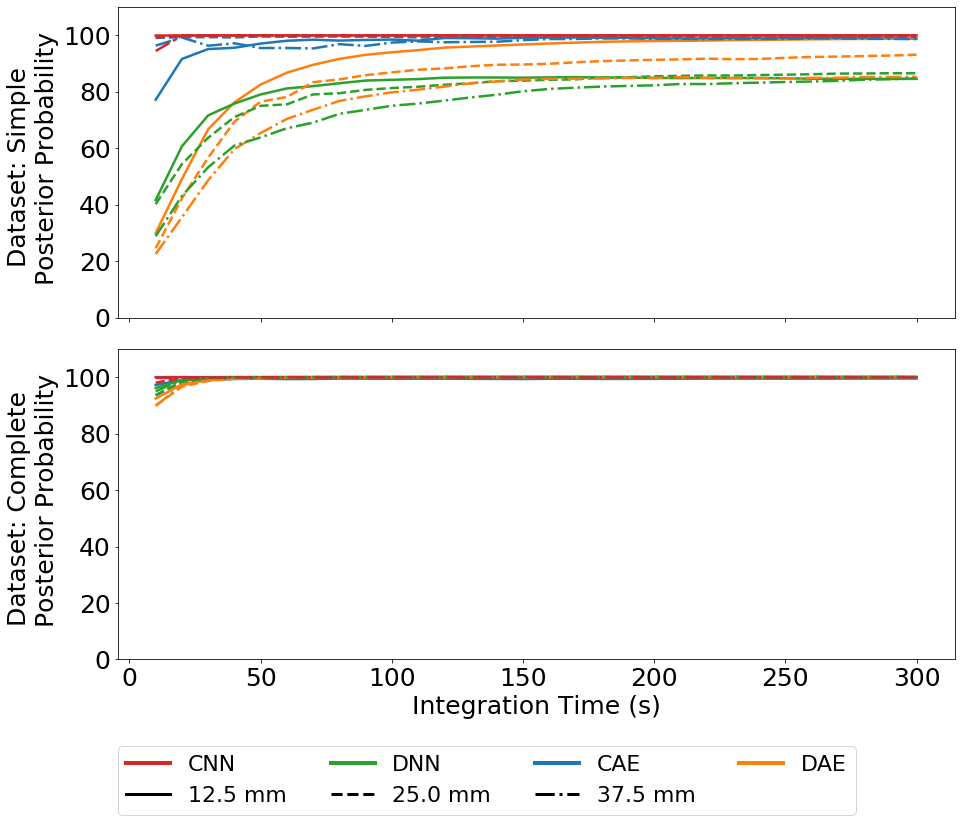

In [42]:
setting = 'easy'
isotope = 'cs137'
gadras_isotope = '137CS'

fig, axs = make_blank_plot()
ax = plt.gca()
ax.legend(custom_lines,
          ['CNN', 
          shielding_thicknesses[isotope][2], 
          'DNN',
          shielding_thicknesses[isotope][1],
          'CAE',
          shielding_thicknesses[isotope][0],
          'DAE',], 
          loc=loc,
          ncol=4,
          prop={'size': 22},
          )


for setting in ['easy', 'full']:
    for shielding_material in ['iron']:
        plot_measured_source_shielded_results(
            results_dataframe=results_dataframe,
            isotope=isotope,
            gadras_isotope=gadras_isotope,
            shielding_material=shielding_material,
            shielding_strings=['light', 'medium', 'heavy'],
            setting=setting,)

fig.subplots_adjust(hspace=0.1)
if save_fig:
    plt.savefig('realspectra-cal-'+isotope,
                bbox_inches='tight')
            
            

In [122]:
spectra_dataframe = results_dataframe[results_dataframe['isotope']=='eu152']
spectra_dataframe = spectra_dataframe[spectra_dataframe['shielding_material']=='iron']
# spectra_dataframe = spectra_dataframe[spectra_dataframe['shielding_material']=='aluminum']

# spectra_dataframe = spectra_dataframe[spectra_dataframe['shielding_strings']=='light']
# spectra_dataframe = spectra_dataframe[spectra_dataframe['shielding_strings']=='medium']
spectra_dataframe = spectra_dataframe[spectra_dataframe['shielding_strings']=='heavy']

# spec_index = 0
spec_index = -1

for mode in [
#     '-easy', 
    '-full'
]:
    for model_class in [
        'cnn',
#         'dnn',
        'caednn',
        'daednn',
    ]:
        all_output_probs = []
        model_id = model_class + mode        
        spec = spectra_dataframe['all_spectra'].values[0][spec_index]
        bagged_probs = ensemble_probas(
            all_models[model_id],
            scalers[model_id],
            [spec],)
        print(model_class + mode,np.max(bagged_probs), mlb.classes_[np.argmax(bagged_probs)])




cnn-full 0.5320002 238U
caednn-full 0.5565251 152EU
daednn-full 0.52046376 152EU
